In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

import dyn
import obs
import enkf.enkf as fil

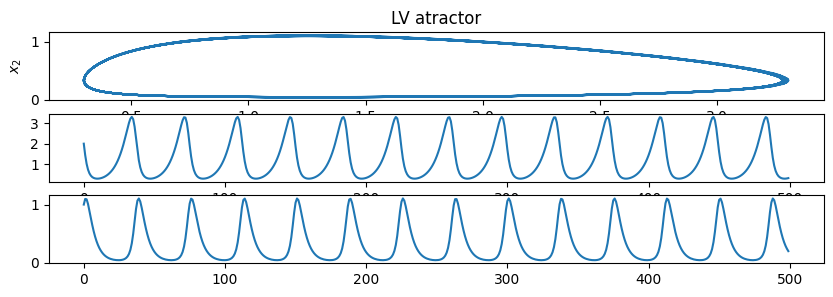

In [2]:
Mdl=dyn.LV(dtcy=0.5) # instancio la clase
x = np.zeros((500,2))
#_,x[0] = Mdl.initialization()  # determino una condicion inicial
x[0]=np.array((2,1))
for it  in range(1,x.shape[0]):
    x[it]=Mdl(x[it-1]) # integro a partir de la condicion inicial el modelo
# Graficacion
xg=x.T # time series
fig,ax = plt.subplots(3,1,figsize=(10, 3))
ax[0].plot(xg[0],xg[1])
ax[0].set_title('LV atractor')
ax[0].set(xlabel=r'$x_1$',ylabel=r'$x_2$');
ax[1].plot(xg[0])
ax[2].plot(xg[1])

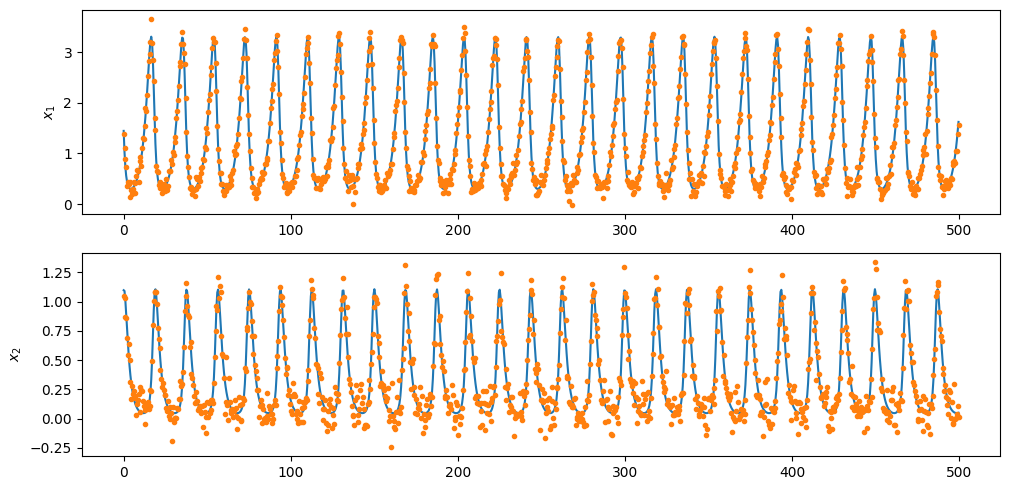

In [3]:
Obs=obs.OBS(H=np.eye(2),R=0.01* np.eye(2))
xt0 = np.array((2,1))
xt_t, y_t = Obs(xt0,1000,Mdl)
xtg_t=xt_t.T; yg_t=y_t.T
time=Mdl.dtcy * np.arange(xt_t.shape[0])

fig,ax = plt.subplots(2,1,figsize=(10, 5))
ax[0].plot(time,xtg_t[0])
ax[0].plot(time,yg_t[0],'.')
ax[0].set(ylabel=r'$x_1$')
ax[1].plot(time,xtg_t[1])
ax[1].plot(time,yg_t[1],'.')
ax[1].set(ylabel=r'$x_2$')
fig.tight_layout()


Assimilating ...


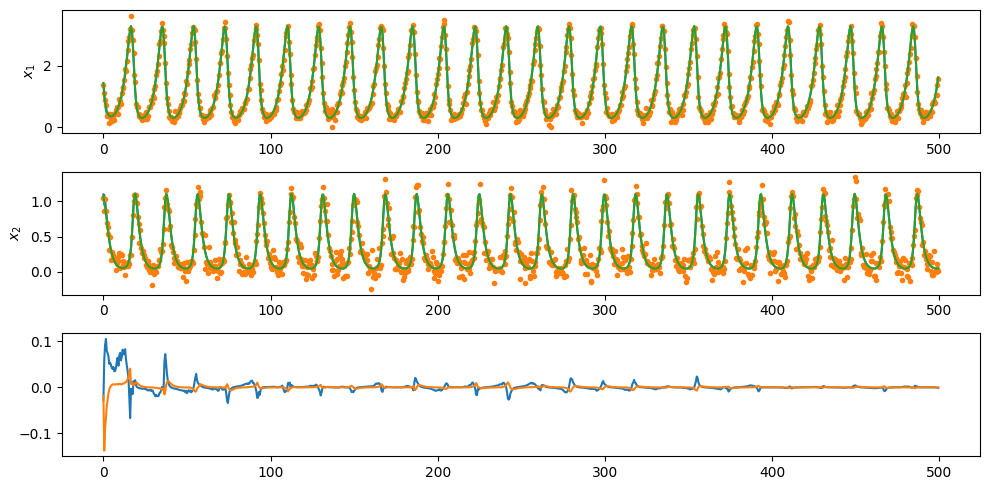

In [4]:
a_kwargs={'assmtd':'perobs',
          'finf':1.0,
          'xt_t':xt_t,
          'finfpar':1.0,}
# Instantiate assimilation
Filter=fil.FILTER(Mdl,Obs,**a_kwargs)
X0 = np.array([3,0.5])[:,None] + 0.5 * rnd.randn(2,100)
# Assimilate 
Xa_t,Xf_t=Filter(X0,y_t)

xag_t=Xa_t.mean(-1).T
fig,ax = plt.subplots(3,1,figsize=(10, 5))
ax[0].plot(time,xtg_t[0])
ax[0].plot(time,yg_t[0],'.')
ax[0].plot(time,xag_t[0])
ax[0].set(ylabel=r'$x_1$')
ax[1].plot(time,xtg_t[1])
ax[1].plot(time,yg_t[1],'.')
ax[1].plot(time,xag_t[1])
ax[1].set(ylabel=r'$x_2$')
ax[2].plot(time,xag_t[0]-xtg_t[0])
ax[2].plot(time,xag_t[1]-xtg_t[1])
fig.tight_layout()


Estimacion de parametros en el LV

[1. 2.]
(4, 100)
Assimilating ...


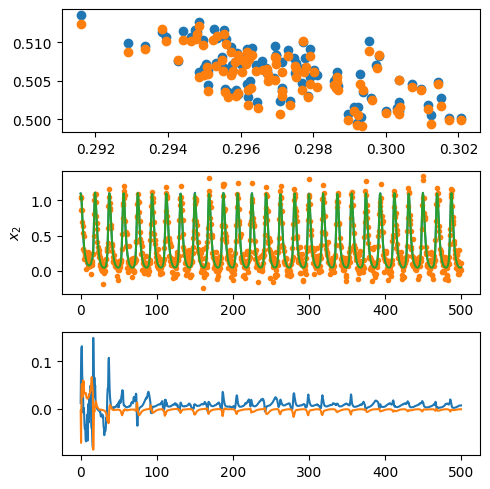

In [17]:
Fmdl=dyn.augLV(dtcy=0.5) # augmented model con los parametros
X0 = np.array([3,0.5,0.5,0.2])[:,None] + np.array([0.5,0.5,0.1,0.1])[:,None] * rnd.randn(4,100)

def setH(indobs,nx):
    ny = len(indobs)
    H = np.zeros((ny,nx))
    for iy in range(ny):
        H[iy,indobs[iy]]=1.0
    return H

H=setH(np.array([0,1]),4)
print(H @ np.array([1,2,3,4]))
Obs=obs.OBS(H=H,R=0.01 * np.eye(2))

print(X0.shape)

Filter=fil.FILTER(Fmdl,Obs,**a_kwargs)
Xa_t,Xf_t=Filter(X0,y_t)
xag_t=Xa_t.mean(-1).T
fig,ax = plt.subplots(3,1,figsize=(5, 5))
#ax[0].plot(time,xtg_t[0])
#ax[0].plot(time,yg_t[0],'.')
#ax[0].plot(time,xag_t[0])
#ax[0].set(ylabel=r'$x_1$')
ax[0].plot(Xf_t[100,2],Xf_t[100,3],'o')
ax[0].plot(Xa_t[100,2],Xa_t[100,3],'o')
#ax[0].plot(y_t[1,0],y_t[1,1],'o')
ax[1].plot(time,xtg_t[1])
ax[1].plot(time,yg_t[1],'.')
ax[1].plot(time,xag_t[1])
ax[1].set(ylabel=r'$x_2$')
ax[2].plot(time,xag_t[0]-xtg_t[0])
ax[2].plot(time,xag_t[1]-xtg_t[1])
fig.tight_layout()


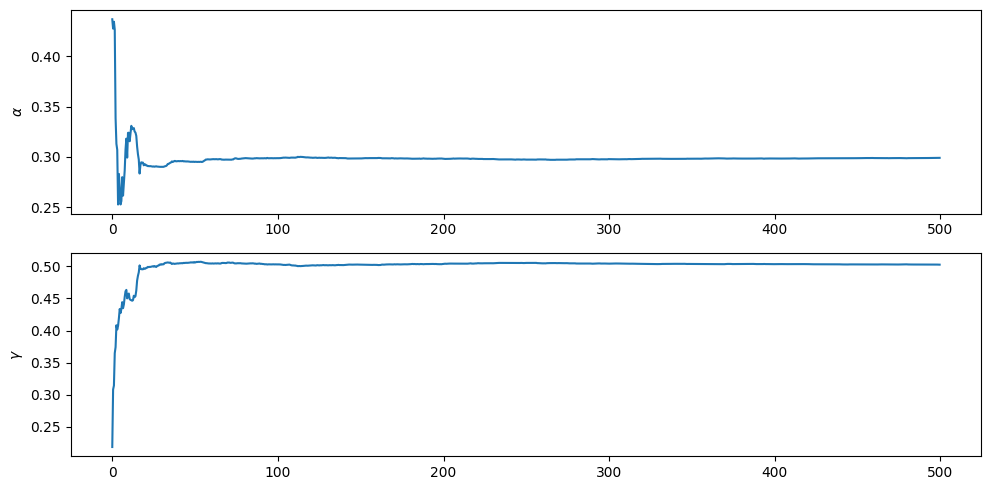

In [15]:
fig,ax = plt.subplots(2,1,figsize=(10, 5))
ax[0].plot(time,xag_t[2])
ax[0].set(ylabel=r'$\alpha$')
ax[1].plot(time,xag_t[3])
ax[1].set(ylabel=r'$\gamma$')
fig.tight_layout()


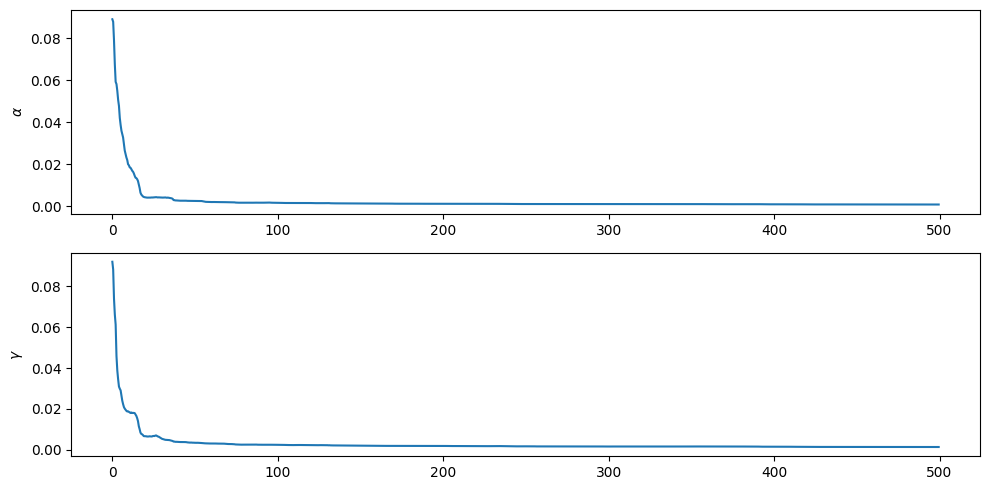

In [18]:
sag_t=Xa_t.std(-1).T
fig,ax = plt.subplots(2,1,figsize=(10, 5))
ax[0].plot(time,sag_t[2])
ax[0].set(ylabel=r'$\alpha$')
ax[1].plot(time,sag_t[3])
ax[1].set(ylabel=r'$\gamma$')
fig.tight_layout()
